In [ ]:
# Instalando jupyter kernel
import sys
!{sys.executable} -m pip install networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando algunas librerías que utilizaremos

# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

# Mostrar imágenes
from IPython.display import HTML

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
vuelos_eeuu = pd.read_csv('vuelos.csv')
vuelos_eeuu.head()


,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,FLY_DATE
0,ANC,SEA,1448,1/10/2008
1,LAX,PBI,2330,1/11/1990
2,SFO,CLT,2296,1/12/1990
3,LAX,MIA,2342,1/10/1990
4,SEA,ANC,1448,1/02/1990


In [ ]:
vuelos_eeuu.describe()

,DISTANCE
count,1500.000000
mean,919.452000
std,594.236315
min,67.000000
25%,448.750000
50%,854.000000
75%,1197.000000
max,3801.000000


In [ ]:
#Creación de nodos
DG=nx.DiGraph()
for row in vuelos_eeuu.iterrows():
  DG.add_edge(row[1]["ORIGIN_AIRPORT"],
              row[1]["DESTINATION_AIRPORT"],
              weight=row[1]["DISTANCE"]
              )

In [ ]:
DG.nodes(data=True)

NodeDataView({'ANC': {}, 'SEA': {}, 'LAX': {}, 'PBI': {}, 'SFO': {}, 'CLT': {}, 'MIA': {}, 'MSP': {}, 'LAS': {}, 'DFW': {}, 'ATL': {}, 'DEN': {}, 'SLC': {}, 'IAH': {}, 'PDX': {}, 'MCI': {}, 'FAI': {}, 'FLL': {}, 'PHX': {}, 'ORD': {}, 'HNL': {}, 'SJU': {}, 'EWR': {}, 'JFK': {}, 'PBG': {}, 'IAG': {}, 'PSE': {}, 'MCO': {}, 'BQN': {}, 'BOS': {}, 'BDL': {}, 'GEG': {}, 'ITO': {}, 'ONT': {}, 'KOA': {}, 'OGG': {}, 'MYR': {}, 'HIB': {}, 'ABR': {}, 'MAF': {}, 'MKE': {}, 'BNA': {}, 'DTW': {}, 'BRO': {}, 'VPS': {}, 'BOI': {}, 'BJI': {}, 'LIH': {}, 'SGF': {}, 'PHL': {}, 'SBN': {}, 'RDD': {}, 'EUG': {}, 'IAD': {}, 'BUF': {}, 'PWM': {}, 'CRP': {}, 'PIA': {}, 'FAT': {}, 'SMF': {}, 'AUS': {}, 'BWI': {}, 'JAX': {}, 'MFR': {}, 'IDA': {}, 'MSN': {}, 'DCA': {}, 'SAT': {}, 'CHS': {}, 'SBA': {}, 'SMX': {}, 'IND': {}, 'CLE': {}, 'GSP': {}, 'ABI': {}, 'RIC': {}, 'BFL': {}, 'OMA': {}, 'RDM': {}, 'CID': {}, 'TPA': {}, 'SYR': {}, 'ROC': {}, 'TYR': {}, 'LAN': {}, 'XNA': {}, 'GSO': {}, 'LGA': {}, 'RSW': {}, 'OAK': 

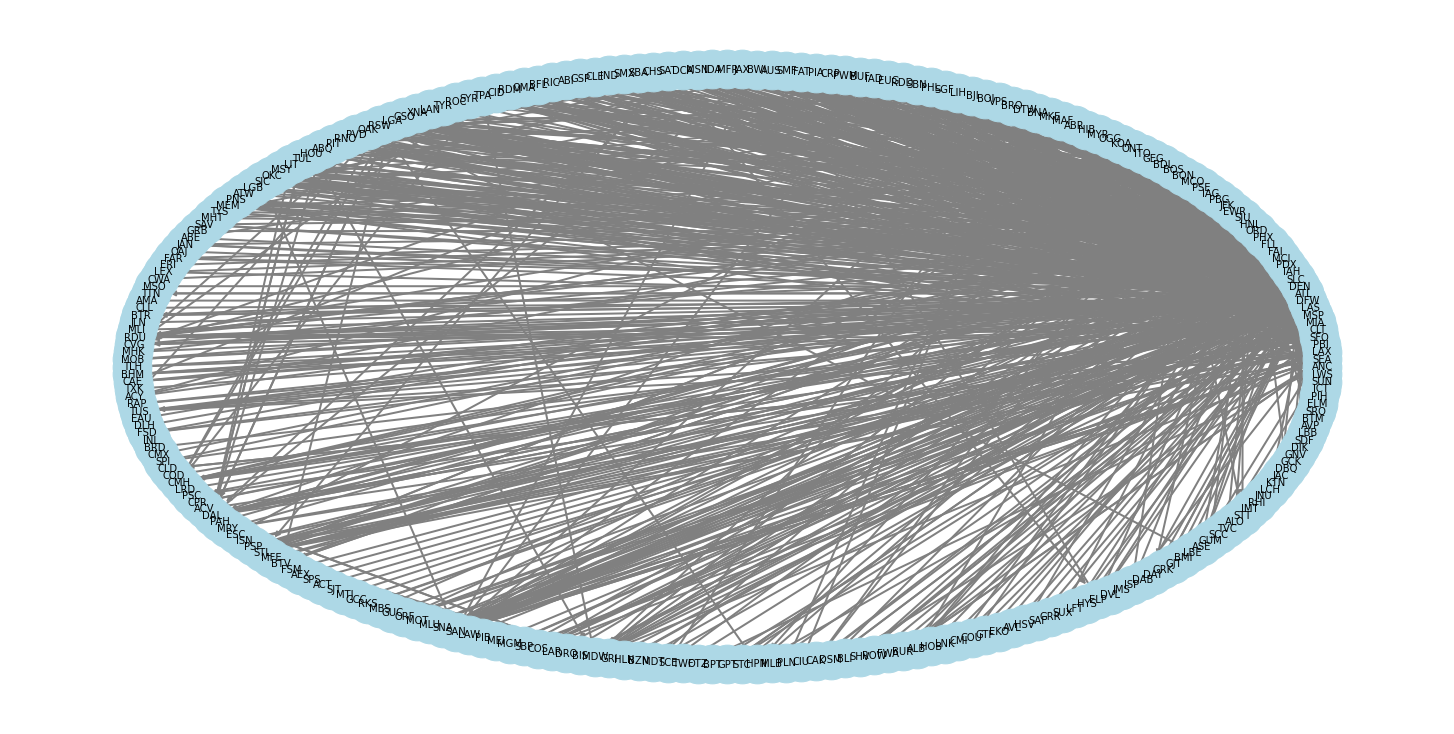

In [ ]:
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=10,
                 width=2, with_labels=True, node_size=1500,
                 
                 )


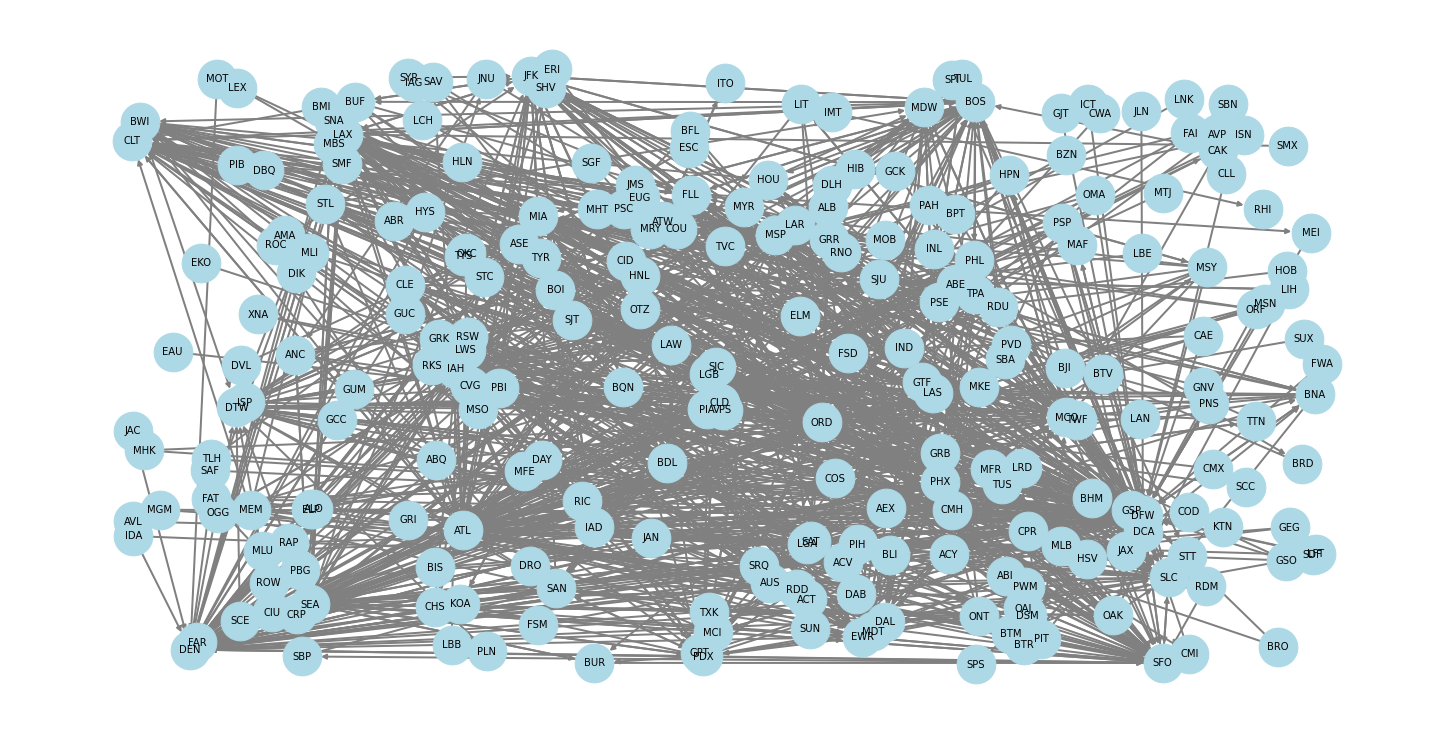

In [ ]:
nx.draw_random(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=10,
                 width=2, with_labels=True, node_size=1500,)

In [ ]:
list(nx.all_shortest_paths(DG, source="LAS", target="FLL", weight=None))

[['LAS', 'MSP', 'FLL'],
 ['LAS', 'ATL', 'FLL'],
 ['LAS', 'DFW', 'FLL'],
 ['LAS', 'BWI', 'FLL'],
 ['LAS', 'DTW', 'FLL'],
 ['LAS', 'EWR', 'FLL'],
 ['LAS', 'ORD', 'FLL'],
 ['LAS', 'JFK', 'FLL'],
 ['LAS', 'DAL', 'FLL']]

In [ ]:
def dijkstra(graph,start,goal):
  shortest_distance={}
  track_predecessor={}
  unseenNodes = graph
  infinity = 99999
  track_path = []
  for node in unseenNodes:
    shortest_distance[node]=infinity
  shortest_distance[start]=0
  while unseenNodes:
    min_distance_node=None
    for node in unseenNodes:
      if min_distance_node is None:
        min_distance_node=node
      elif shortest_distance[node]<shortest_distance[min_distance_node]:
        min_distance_node=node
    path_options = graph[min_distance_node].items()
    for child_node, weight in path_options:
      if weight + shortest_distance[min_distance_node]<shortest_distance[child_node]:
        shortest_distance[child_node]=weight+shortest_distance[min_distance_node]
        track_predecessor[child_node]=min_distance_node
    unseenNodes.pop(min_distance_node)


  currentNode=goal

  while currentNode != start:
    try:
      track_path.insert(0,currentNode)
      currentNode= track_predecessor[currentNode]
    except KeyError:
      print("Camino no es posible")
      break
  track_path.insert(0,start)
  if shortest_distance[goal] != infinity:
    print("El camino más corto es " + str(shortest_distance[goal]))
    print("El camino más optimo es" + str(track_path))

def __init__():
  graph1 = {
  #'ANC':{'SEA':1448,'PDX':1542,'PHX':2552, 'MSP' :2519, 'OTZ' :548, 'SCC' :627},
  #'SEA':{'ANC':1448, 'MSP':1399, 'MIA' :2724, 'PHX' :1107, 'DEN' :1024, 'IAH' :1874, 'DFW' :1660, 'EWR' :2402, 'SJC' :697, 'OAK' :671, 'SFO' :679, 'LAS':867, 'IAD':2306 , 'LAX' :954, 'SNA' :978, 'ORD' :1721, 'MDW' :1733 , 'ATL':2182, 'PHL' :2378, 'SAN' :1050, 'SLC':689 , 'PSP' :987, 'SMF':605 ,'DTW' :1927, 'PDX' :129, 'JFK' : 2422, 'ONT' :956, 'JNU' :909, 'KTN' :680, 'BUR' : 937},
  'ANC':{'SEA':1448, 'PDX':1542},
  'SEA':{'ANC':1448, 'MSP':1399},
  'PDX':{'ANC':1542,},
  'MSP':{'SEA':1399}
  }
  print(graph1)
  dijkstra(graph1, "ANC", "SEA")
  print(graph1)
  dijkstra(graph1, "ANC", "MSP")


In [ ]:
print(DG["ANC"])
print("//////////////////")
print(DG["LAX"])

{'SEA': {'weight': 1448}, 'PDX': {'weight': 1542}, 'PHX': {'weight': 2552}, 'MSP': {'weight': 2519}, 'OTZ': {'weight': 548}, 'SCC': {'weight': 627}}
//////////////////
{'PBI': {'weight': 2330}, 'MIA': {'weight': 2342}, 'CLT': {'weight': 2125}, 'MSP': {'weight': 1535}, 'IAH': {'weight': 1379}, 'DEN': {'weight': 862}, 'DFW': {'weight': 1235}, 'ORD': {'weight': 1744}, 'SEA': {'weight': 954}, 'ATL': {'weight': 1947}, 'EWR': {'weight': 2454}, 'SFO': {'weight': 337}, 'STL': {'weight': 1592}, 'JFK': {'weight': 2475}, 'LAS': {'weight': 236}, 'PHL': {'weight': 2402}, 'AUS': {'weight': 1242}, 'PHX': {'weight': 370}, 'PDX': {'weight': 834}, 'BOS': {'weight': 2611}, 'DTW': {'weight': 1979}, 'SLC': {'weight': 590}, 'HNL': {'weight': 2556}, 'BNA': {'weight': 1797}, 'CLD': {'weight': 86}, 'IAD': {'weight': 2288}, 'SMF': {'weight': 373}, 'DAL': {'weight': 1246}, 'SAN': {'weight': 109}}
